<a href="https://colab.research.google.com/github/AkhileshMauryaa/MC_Donald-s_Market_Segment_Analysis/blob/main/Mc_Donald's_Market_Segments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')


# collect Data

In [ ]:
df= pd.read_csv("/content/mcdonalds.csv")

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


#  Exploring Data

In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
df.shape

(1453, 15)

In [ ]:
MD_x = df.iloc[:, :11]

MD_x = (MD_x == "Yes").astype(int)
column_means = np.round(MD_x.mean(axis=0), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


# Extracting Segments

In [ ]:
pca = PCA()
pca.fit(MD_x)

# Access summary information
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

# Create a DataFrame for the summary
summary_df = pd.DataFrame({
    "Principal Component": [f"PC{i + 1}" for i in range(len(explained_variance_ratio))],
    "Standard Deviation": np.sqrt(pca.explained_variance_),
    "Proportion of Variance": explained_variance_ratio,
    "Cumulative Proportion": np.cumsum(explained_variance_ratio)
})

# Print the summary
print(summary_df.round(1))

   Principal Component  Standard Deviation  Proportion of Variance  \
0                  PC1                 0.8                     0.3   
1                  PC2                 0.6                     0.2   
2                  PC3                 0.5                     0.1   
3                  PC4                 0.4                     0.1   
4                  PC5                 0.3                     0.1   
5                  PC6                 0.3                     0.1   
6                  PC7                 0.3                     0.0   
7                  PC8                 0.3                     0.0   
8                  PC9                 0.3                     0.0   
9                 PC10                 0.2                     0.0   
10                PC11                 0.2                     0.0   

    Cumulative Proportion  
0                     0.3  
1                     0.5  
2                     0.6  
3                     0.7  
4                  

In [ ]:
SD = np.sqrt(pca.explained_variance_)

# Calculate loadings
load = pca.components_

# Calculate rotation matrix
rot_matrix = pca.components_.T

# Create a DataFrame for the rotated matrix
rot_df = pd.DataFrame(rot_matrix, index=MD_x.columns.values, columns=summary_df['Principal Component'])

# Round and display the rotated matrix
rot_df = round(-rot_df, 3)
print(rot_df)

Principal Component    PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8  \
yummy                0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013   
convenient           0.155 -0.016  0.063  0.142 -0.278  0.348  0.060  0.113   
spicy                0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376   
fattening           -0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.590   
greasy              -0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138   
fast                 0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628   
cheap                0.337  0.611  0.149 -0.119  0.129  0.103  0.040 -0.140   
tasty                0.472 -0.307  0.287  0.003  0.211  0.077 -0.360  0.073   
expensive           -0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.030   
healthy              0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.350 -0.176   
disgusting          -0.375  0.140  0.089 -0.370  0.729  0.211  0.027  0.167   

Principal Component    PC9   PC10   PC11  
yummy   

# PCA

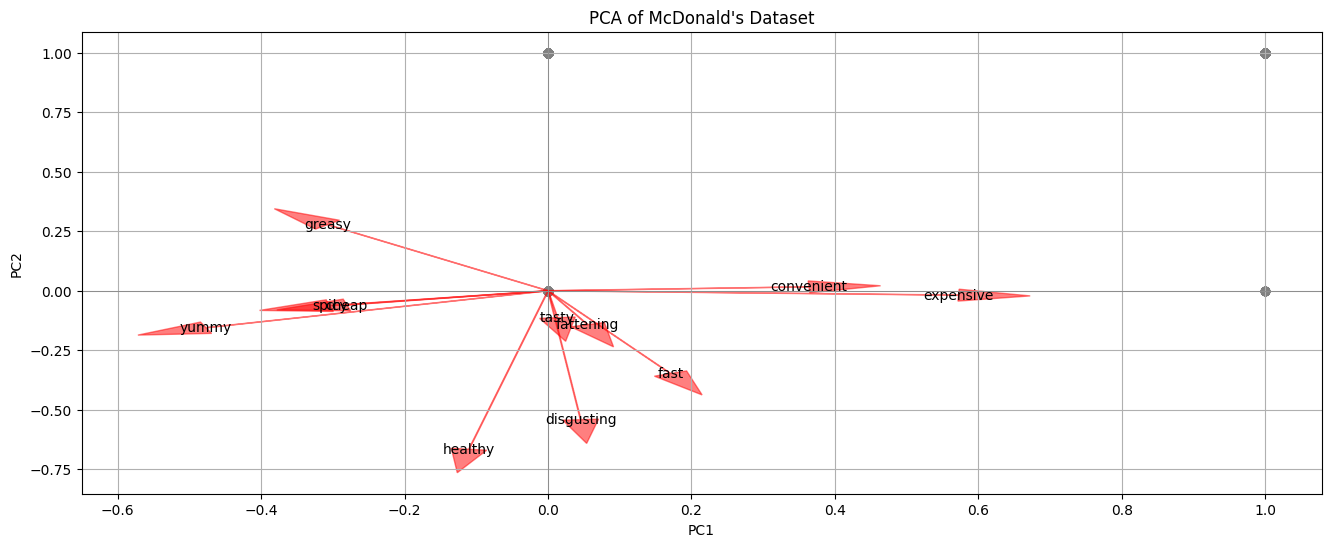

In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(MD_x.iloc[:, 0], MD_x.iloc[:, 1], color='grey', alpha=0.5)
# Add the projection of the axes (loadings)
for i, (component, name) in enumerate(zip(pca.components_, MD_x.columns)):
    plt.arrow(0, 0, component[0], component[1], color='red', alpha=0.5, head_width=0.05, head_length=0.1)
    plt.text(component[0], component[1], name, color='black', ha='center', va='center')

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonald\'s Dataset')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

# Display the plot
plt.show()

#  Using k-Means

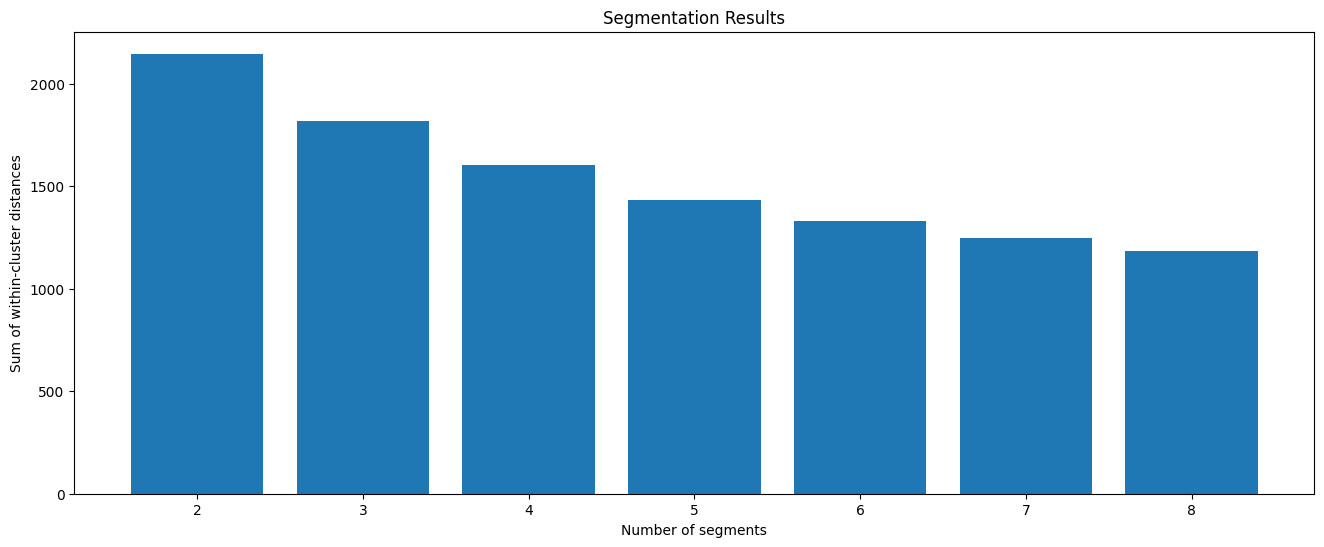

In [ ]:
np.random.seed(1234)
nrep = 10
# Perform k-means clustering with multiple runs
# Define the range of clusters to try
num_segments = range(2, 9)  # Starting from 2 instead of 1
within_cluster_distances = []
MD_km28 = {}

# Perform k-means clustering for each number of clusters
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

# Plot the sum of within-cluster distances for each number of clusters
plt.figure(figsize=(16, 6))
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

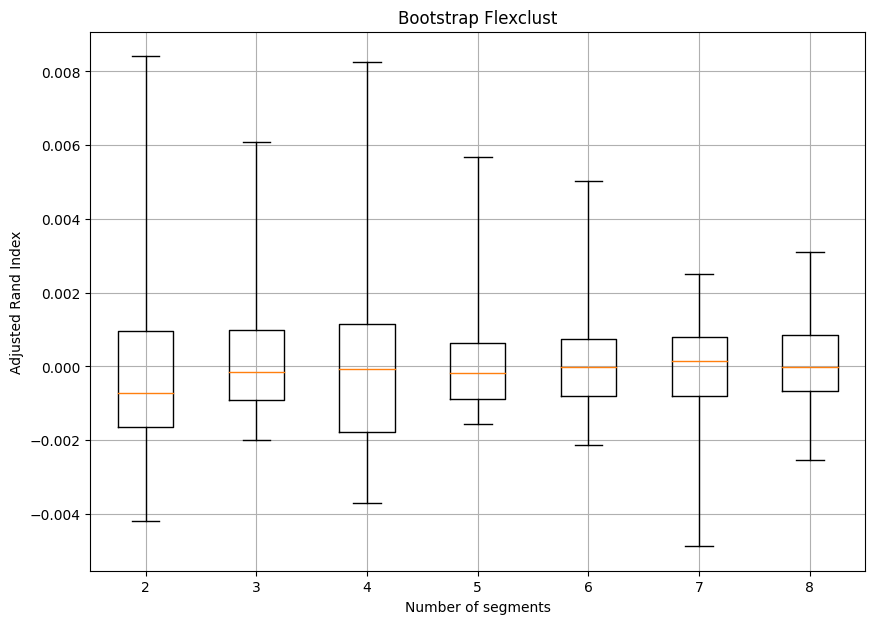

In [ ]:

np.random.seed(1234)
nboot = 100  # Number of bootstrap samples
nrep = 10    # Number of repetitions for k-means
num_segments = range(2, 9)  # Range of cluster numbers to try

# Generate bootstrap samples
bootstrap_samples = [resample(MD_x.values, random_state=np.random.randint(10000)) for _ in range(nboot)]

# Initialize list to store adjusted Rand index for each number of clusters
adjusted_rand_index = []

# Perform k-means clustering for each number of clusters and each bootstrap sample
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=np.random.randint(10000))
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list to align with num_segments
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create a boxplot of adjusted Rand index for each number of clusters
plt.figure(figsize=(10, 7))
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.grid(True)
plt.show()

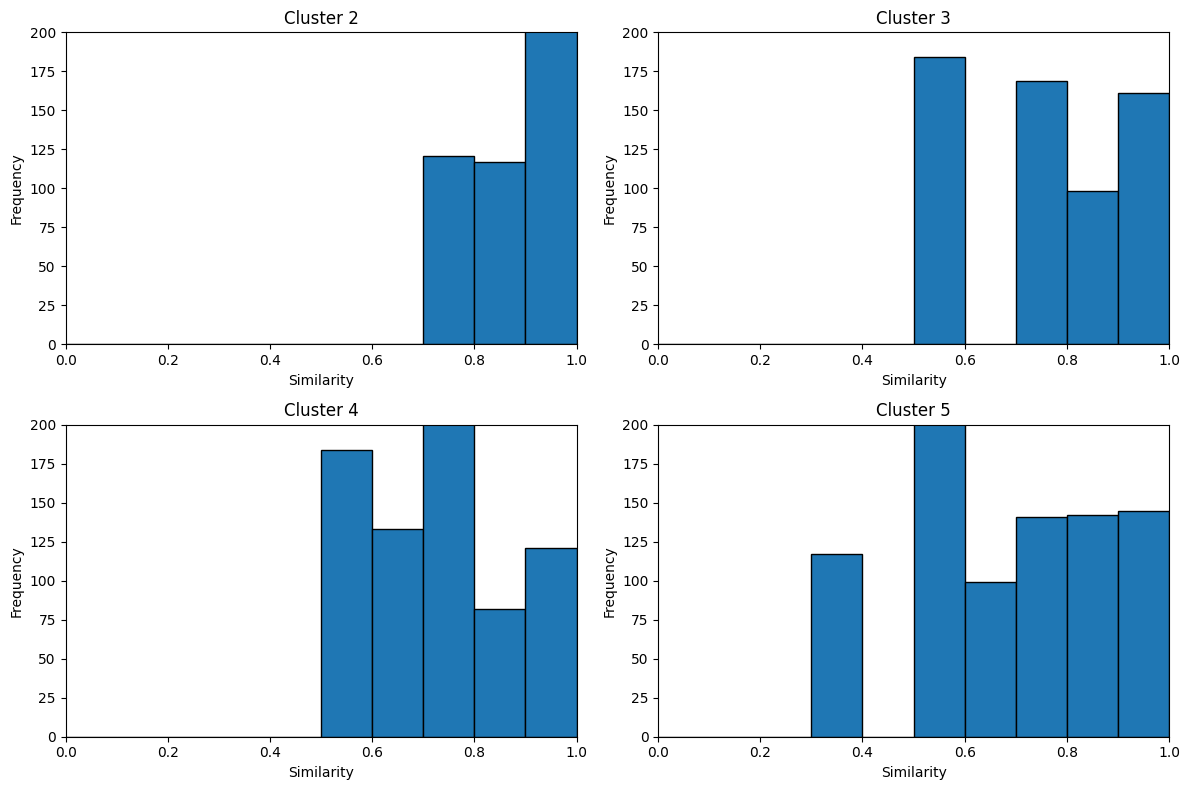

In [ ]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for clusters 1 to 4
for i in range(1, 5):
    # Get cluster assignments and compute similarities
    labels = MD_km28[str(i+1)].predict(MD_x)
    similarities = MD_km28[str(i+1)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot histogram
    axs[row, col].hist(similarities, bins=num_bins, range=range_values, edgecolor='black')
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(i+1))

    # Set limits and ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust layout
plt.tight_layout()
plt.show()

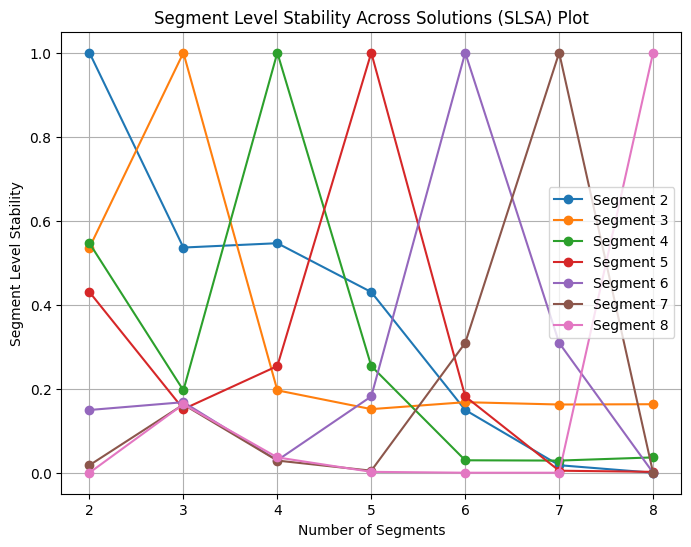

In [ ]:
num_segments = range(2, 9)
segment_stability = []

for segment in num_segments:
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

# Plot Segment Level Stability Across Solutions (SLSA)
plt.figure(figsize=(8, 6))

for i, segment in enumerate(num_segments):
    stability = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    plt.plot(num_segments, stability, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()

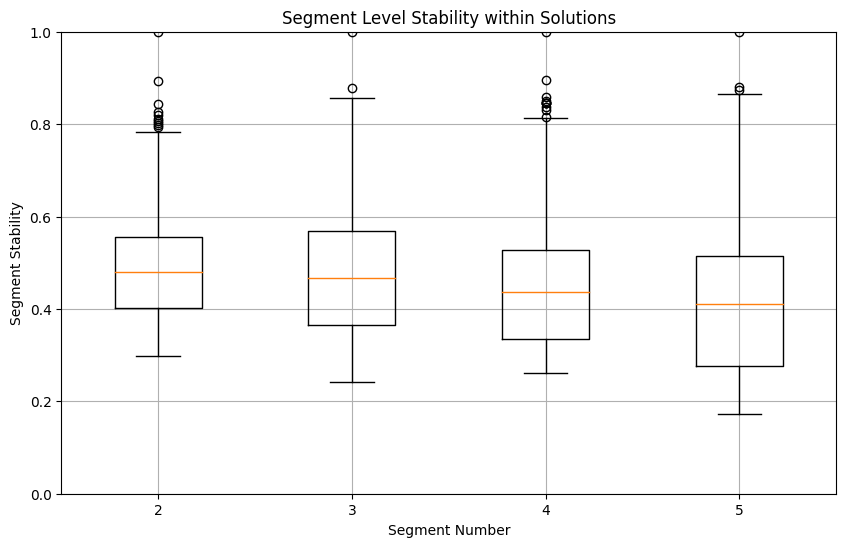

In [ ]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

# Compute labels and similarities for each segment solution
for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

# Calculate stability values
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Plot segment level stability within solutions
plt.figure(figsize=(10, 6))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.grid(True)
plt.show()

# Using Mixtures of Distributions

   Components        LogLik           AIC           BIC           ICL
0           2  11147.820925 -21985.641850 -21167.027072 -33795.933742
1           3  12631.005852 -24796.011705 -23565.448845 -39814.339544
2           4  18279.584645 -35938.230203 -34295.719261 -61928.773814
3           5  22229.954842 -43681.909685 -41627.450662 -77782.156392
4           6  24820.884917 -48707.873657 -46241.466552 -87759.692580
5           7  25187.432462 -49284.866011 -46406.510825 -88832.557379
6           8  26443.917968 -51642.194309 -48351.891041 -93476.702349


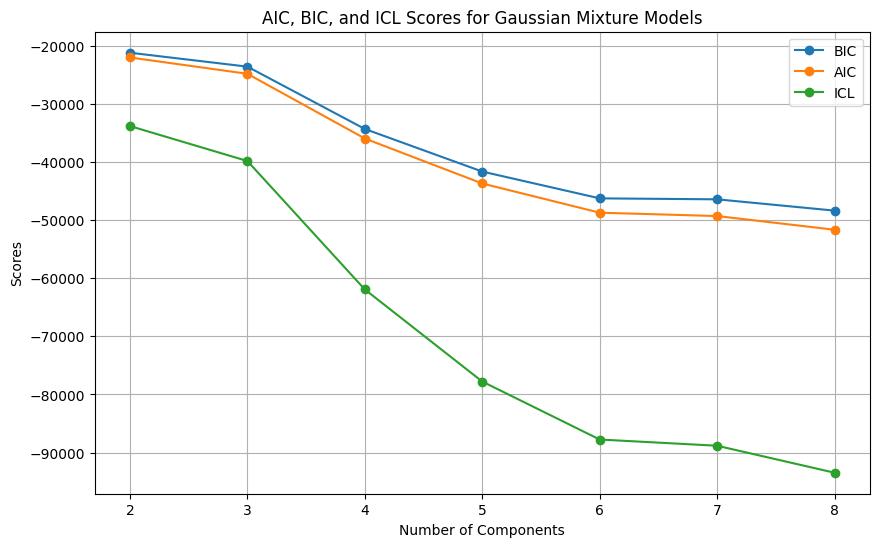

In [ ]:
from sklearn.mixture import GaussianMixture
MD_m28 = {}
bic_scores = []
aic_scores = []
icl_scores = []
log_likelihoods = []

for k in range(2, 9):
    gm = GaussianMixture(n_components=k, n_init=nrep, random_state=1234)
    gm.fit(MD_x)
    MD_m28[str(k)] = gm

    # Calculate BIC, AIC, and log-likelihood
    bic = gm.bic(MD_x)
    aic = gm.aic(MD_x)
    log_likelihood = gm.lower_bound_ * MD_x.shape[0]

    bic_scores.append(bic)
    aic_scores.append(aic)
    log_likelihoods.append(log_likelihood)

    # Calculate ICL (Integrated Completed Likelihood)
    labels = gm.predict(MD_x)
    n_samples, n_features = MD_x.shape
    icl = bic - 2 * log_likelihood + np.sum([np.sum(labels == i) * np.log(np.sum(labels == i)) for i in range(k)])
    icl_scores.append(icl)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Components': range(2, 9),
    'LogLik': log_likelihoods,
    'AIC': aic_scores,
    'BIC': bic_scores,
    'ICL': icl_scores
})

print(results_df)

# Plot the BIC scores for each model
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), bic_scores, marker='o', label='BIC')
plt.plot(range(2, 9), aic_scores, marker='o', label='AIC')
plt.plot(range(2, 9), icl_scores, marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Scores')
plt.title('AIC, BIC, and ICL Scores for Gaussian Mixture Models')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Cluster the data using Gaussian Mixture Model with k=4
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x)

# Store the cluster assignments in a DataFrame
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filter the data based on GMM cluster assignment
MD_m4 = MD_x[results['mixture'] == 3]

# Cluster the filtered data using KMeans with k=4
k4_m4 = KMeans(n_clusters=4, random_state=1234)
k4_m4_clusters = k4_m4.fit_predict(MD_m4)

# Store the cluster assignments of the filtered data in a DataFrame
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print cross-tabulations
print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [ ]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

# Compute log-likelihood for MD.m4a
log_likelihood_m4a = gmm_m4a.score(MD_x)

# Define and fit Gaussian Mixture Model with 4 components for MD.m4
gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

# Compute log-likelihood for MD.m4
log_likelihood_m4 = gmm_m4.score(MD_x)

# Print log-likelihood values
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.259923148773083
Log-likelihood for MD.m4: 6.574475227883556


In [ ]:
like_counts = df['Like'].value_counts()

# Reverse the counts
reversed_counts = like_counts.iloc[::-1]

# Print the reversed counts
print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [ ]:
from patsy import dmatrices
np.random.seed(1234)

# Fit a finite mixture of linear regression models with the EM algorithm
n_components = 2
n_init = 10

# Use dmatrices to create design matrices
y, X = dmatrices(formula, data=df)

# Instantiate the Gaussian Mixture Model
model = GaussianMixture(n_components=n_components, n_init=n_init)

# Fit the model
MD_reg2 = model.fit(X)

# Print the cluster sizes
cluster_sizes = np.bincount(model.predict(X))
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

Cluster sizes:
1: 468
2: 985


# Profiling Segments

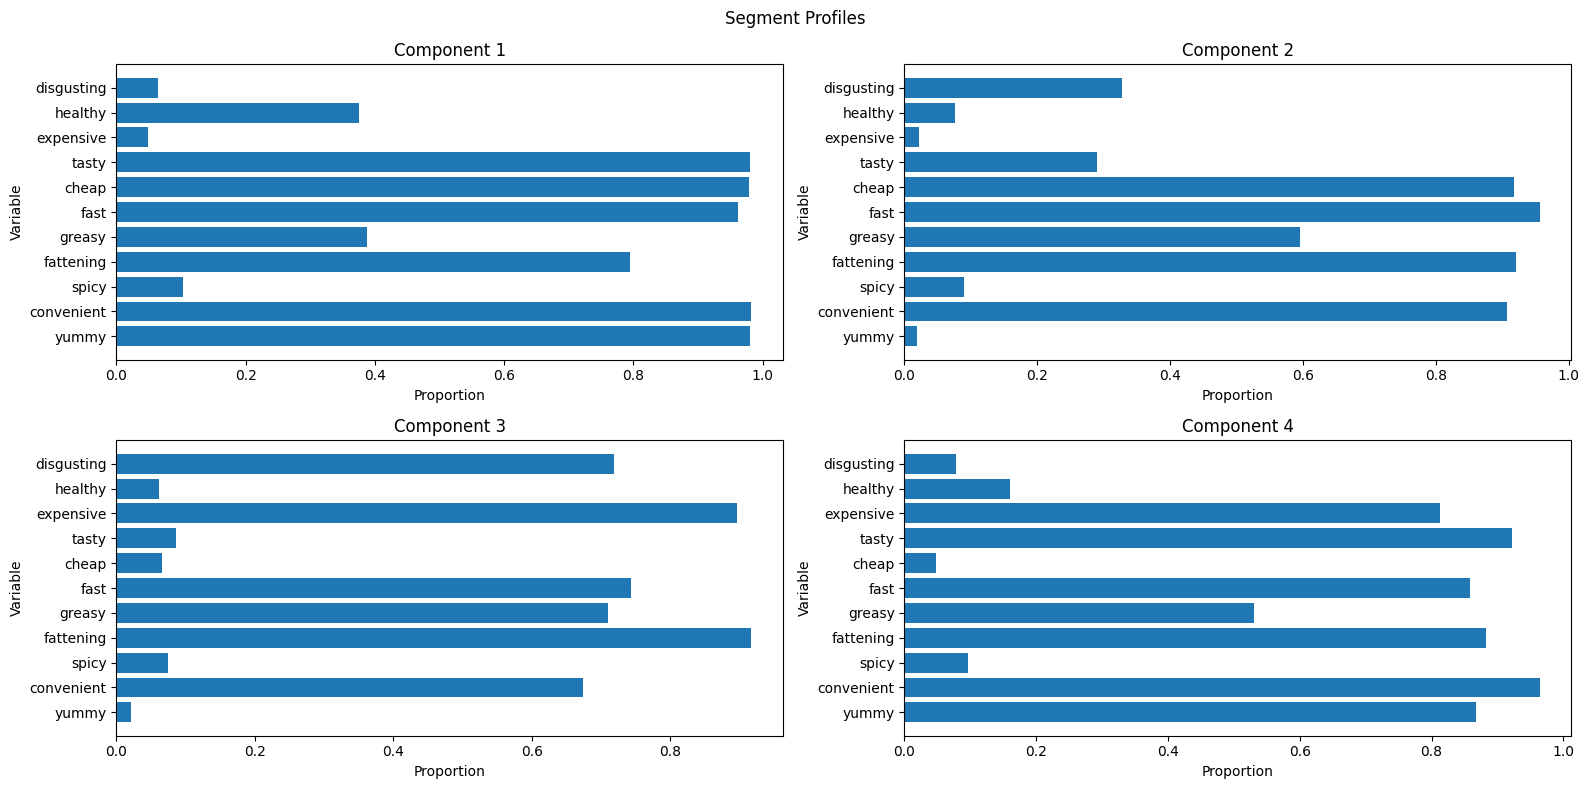

In [ ]:
kmeans = MD_km28['4']
labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for i, ax in enumerate(axs.flat):
    ax.barh(range(MD_mean.shape[1]), MD_mean.iloc[i])
    ax.set_title(f'Component {i+1}')
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

fig.suptitle('Segment Profiles')
fig.tight_layout()

plt.show()

# : Describing Segments

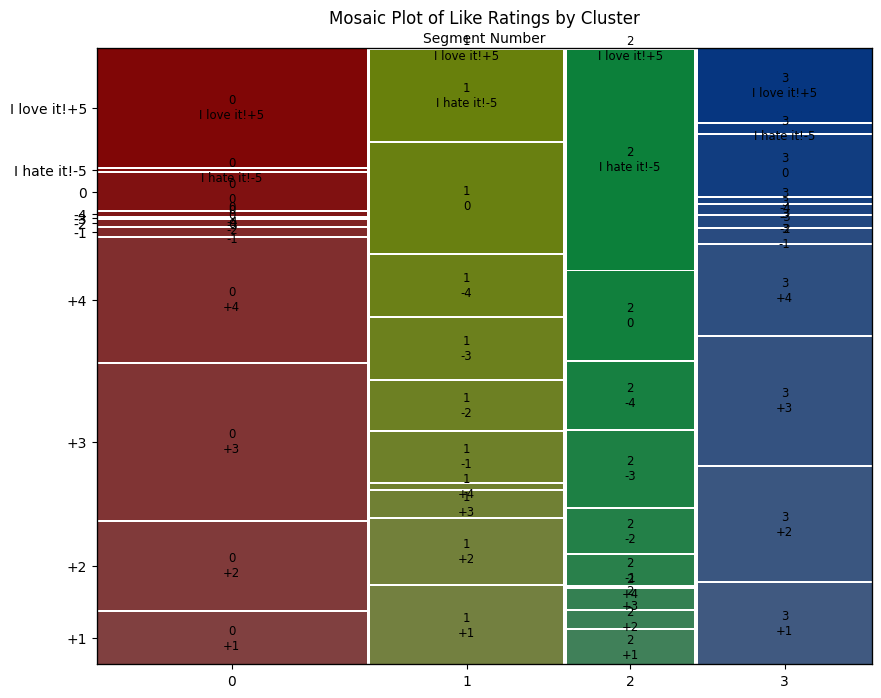

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
cat_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
               'tasty', 'expensive', 'healthy', 'disgusting', 'Gender', 'VisitFrequency']
for col in cat_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Select relevant features
X = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
        'tasty', 'expensive', 'healthy', 'disgusting']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X)

# Get cluster assignments
df['cluster_num'] = kmeans.labels_

# Create a contingency table
contingency_table = pd.crosstab(df['cluster_num'], df['Like'])

# Plot the mosaic plot
plt.rcParams['figure.figsize'] = (10, 8)
mosaic(contingency_table.stack(), title="Mosaic Plot of Like Ratings by Cluster")
plt.xlabel("Segment Number")
plt.ylabel("Like Ratings")
plt.show()

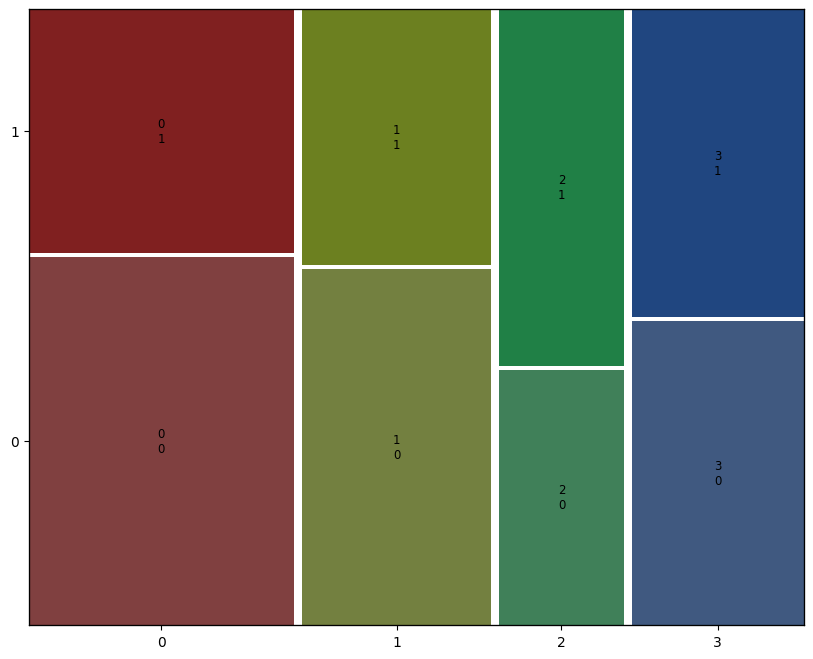

In [ ]:
MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(), gap=0.01)

plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

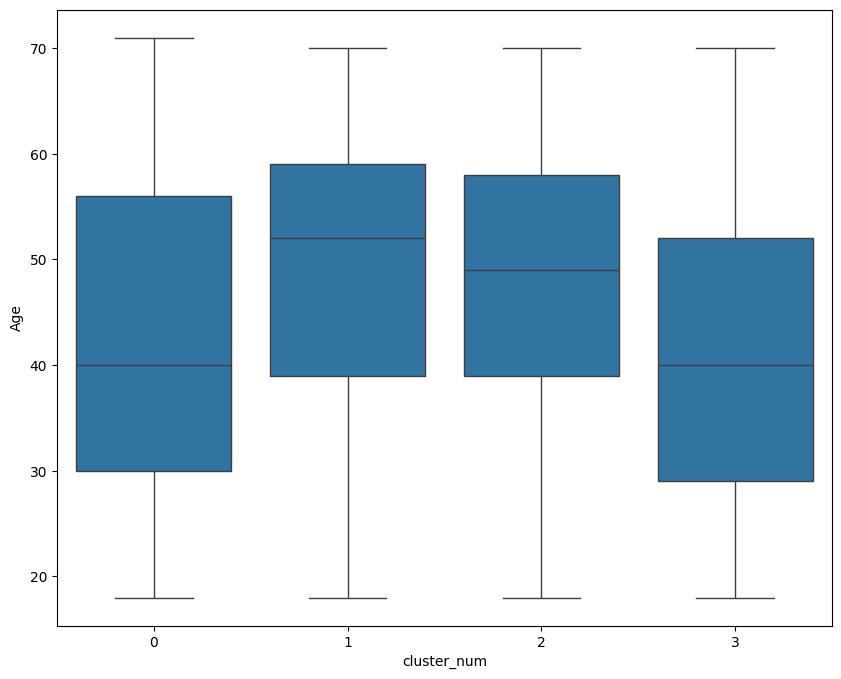

In [ ]:
sns.boxplot(x="cluster_num", y="Age", data=df)

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1,1


In [ ]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.614035
1,1,2.718579
2,2,2.706612
3,3,2.536145


In [ ]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.962963
1,1,5.144809
2,2,6.714876
3,3,3.602410


In [ ]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.397661
1,1,0.418033
2,2,0.582645
3,3,0.503012


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.397661,3.962963,2.614035
1,1,0.418033,5.144809,2.718579
2,2,0.582645,6.714876,2.706612
3,3,0.503012,3.602410,2.536145


# Selecting (the) Target Segment(s)

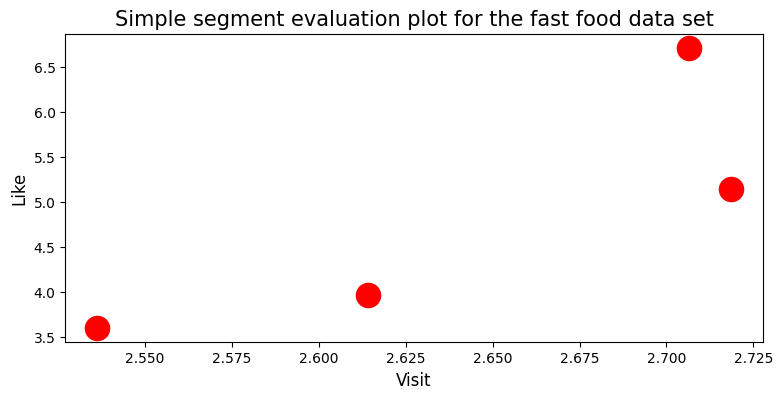

In [ ]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()